# Prep for PyTorch

In [24]:
import pymongo
import matplotlib.pyplot as plt
import numpy as np
# import torch
# import torchvision
# import torch.utils.data as data_utils
# from torch.autograd import Variable
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim

%matplotlib inline

## Sketchpad

Try to load/display spectro as image, and get accustomed to types of transforms that might have to happen to pull a spectrogram into a shape that PyTorch would want to use.

In [81]:
test_spec = np.load("../specs/mel/000000.npy")

In [103]:
def arr_stats(ndarray):
    print("Min:", np.min(ndarray))
    print("Max:", np.max(ndarray))
    print("Mean:", np.mean(ndarray))
    print("Std:", np.std(ndarray))
    print("Shape:", np.shape(ndarray))

In [104]:
arr_stats(test_spec)

Min: -80.0
Max: 0.0
Mean: -63.8204098953
Std: 16.01764538
Shape: (1, 512, 431)


In [105]:
test_norm = normalize_dbspec(test_spec)
arr_stats(test_norm)

Min: 0.0
Max: 1.0
Mean: 0.202244876309
Std: 0.20022056725
Shape: (1, 512, 431)


In [106]:
# squeeze 3D grayscale image to 2D, flips along y-axis
# test_reshaped = np.transpose(test_norm, (1,2,0)).reshape(512,431)[::-1,:]
test_edit = test_norm.squeeze()[::-1,:]
test_edit.shape

(512, 431)

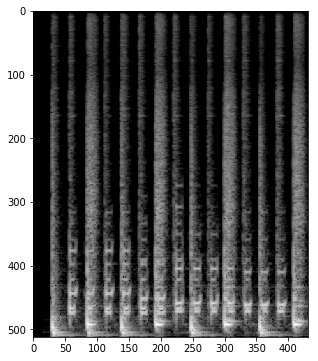

In [110]:
plt.figure(figsize=(12,6))
plt.imshow(test_edit, cmap=plt.cm.gray)

## PyTorch Tutorial Sprint


### What is PyTorch?

In [1]:
import torch

In [20]:
x = torch.Tensor(5,3)
print(x)


 0.0000e+00 -1.5846e+29  0.0000e+00
-1.5846e+29  9.8091e-45  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]



In [5]:
x = torch.rand(5,3)
print(x)


 0.4899  0.8109  0.4632
 0.2596  0.8750  0.0548
 0.0824  0.3542  0.9606
 0.3072  0.7037  0.2075
 0.6268  0.9261  0.6308
[torch.FloatTensor of size 5x3]



In [6]:
print(x.size())

torch.Size([5, 3])


In [10]:
# same as doing...
print(x.shape)

torch.Size([5, 3])


In [11]:
y = torch.rand(5,3)
print(x + y)


 1.3481  1.3126  1.3772
 0.8789  1.2847  0.0850
 1.0691  0.5790  1.0228
 0.5867  1.1014  0.2445
 1.5401  1.3115  1.0982
[torch.FloatTensor of size 5x3]



In [12]:
# or
print(torch.add(x,y))


 1.3481  1.3126  1.3772
 0.8789  1.2847  0.0850
 1.0691  0.5790  1.0228
 0.5867  1.1014  0.2445
 1.5401  1.3115  1.0982
[torch.FloatTensor of size 5x3]



In [14]:
# in place
y.add_(x)
print(y)


 1.3481  1.3126  1.3772
 0.8789  1.2847  0.0850
 1.0691  0.5790  1.0228
 0.5867  1.1014  0.2445
 1.5401  1.3115  1.0982
[torch.FloatTensor of size 5x3]



In [15]:
# same numpy indexing, just like pandas iloc
print(y[:,1])


 1.3126
 1.2847
 0.5790
 1.1014
 1.3115
[torch.FloatTensor of size 5]



#### Numpy <> Torch

In [17]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [18]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [19]:
# change one, the other changes -- not a copy, but a view (!!)
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [25]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



#### If Cuda is available...

In [26]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

### Autograd: automatic differentiation

From tutorial: If you want to compute the derivatives, you can call `.backward()` on a `Variable`. If `Variable` is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to `backward()`, however if it has more elements, you need to specify a `grad_output` argument that is a tensor of matching shape.

#### Variable

In [27]:
from torch.autograd import Variable

In [28]:
x = Variable(torch.ones(2,2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [29]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [30]:
print(x.grad_fn)
print(y.grad_fn)

None


In [31]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [32]:
torch.Tensor([1.0])


 1
[torch.FloatTensor of size 1]

#### Gradient

In [33]:
out.backward()

In [34]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

